In [ ]:
from huggingface_hub import login
import os
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

# Set your Hugging Face token
os.environ["HUGGINGFACE_TOKEN"] = "YOUR_TOKEN"  # Replace with your actual token

# Alternatively, you can login via the CLI:
# huggingface-cli login


In [ ]:
# prompt: hugging face login

# huggingface-cli login
login(token = os.environ.get('HUGGINGFACE_TOKEN'))  # This will prompt you to paste your HF token

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForCausalLM

messages = [
    {"role": "user", "content": "Who are you?"},
]
# Load model directly

llama3_pipe = pipeline("text-generation", model="meta-llama/Llama-3.2-1B-Instruct")
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B-Instruct")
model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-3.2-1B-Instruct")
llama3_pipe(messages)

config.json:   0%|          | 0.00/877 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


[{'generated_text': [{'role': 'user', 'content': 'Who are you?'},
   {'role': 'assistant',
    'content': 'I\'m an artificial intelligence model known as Llama. Llama stands for "Large Language Model Meta'}]}]

In [ ]:
def query_llm(prompt, max_new_tokens=500, temperature=0.7):
    """

    Args:
        prompt (str): The prompt to send to the model
        max_new_tokens (int): Maximum length of the response
        temperature (float): Controls randomness (0-1)

    Returns:
        str: The model's response
    """
    try:
        # Format the prompt according to Llama 3's chat template
        messages = [{"role": "user", "content": prompt}]
        formatted_prompt = tokenizer.apply_chat_template(messages, tokenize=False)

        # Generate the response
        result = llama3_pipe(
            formatted_prompt,
            max_new_tokens=max_new_tokens,
            temperature=temperature,
            do_sample=True,
            top_p=0.9,
        )

        return result[0]["generated_text"]
    except Exception as e:
        print(f"Error querying Llama 3: {e}")
        return None

def calculate_response_metrics(response):
    """
    Calculate basic metrics about the response.

    Args:
        response (str): The model's response

    Returns:
        dict: Dictionary of metrics
    """
    metrics = {
        "word_count": len(response.split()),
        "char_count": len(response),
        "sentence_count": response.count('.') + response.count('!') + response.count('?'),
    }
    return metrics


In [ ]:
# Test the Llama 3 setup
test_prompt = "What is prompt engineering?"
response = query_llm(test_prompt)
print(response)


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

What is prompt engineering?<|eot_id|>assistant

Prompt engineering is the process of designing and optimizing the structure and content of text prompts to elicit specific responses from language models, such as language translation, sentiment analysis, or question answering systems. The goal of prompt engineering is to create effective and efficient prompts that guide the model to produce accurate and relevant responses.

Prompt engineering involves several key aspects:

1. **Understanding the task**: The first step is to comprehend the specific task at hand, including the model's input requirements, the desired output, and any constraints or limitations.
2. **Defining the prompt structure**: The prompt engineer defines the structure of the prompt, including the format, tone, and syntax. This helps the model to u

In [ ]:
# Define a set of tasks for comparison
tasks = [
    "Classify the following review as positive or negative: 'The service was terrible but the food was amazing.'",
    "Identify the emotion in this sentence: 'I can't believe I failed the exam after studying so hard.'",
    "Categorize this news headline as politics, sports, or entertainment: 'New trade agreement signed between countries.'",
    "Determine if this statement is a fact or opinion: 'Coffee is the best beverage for morning productivity.'"
]

# Define few-shot examples for each task
few_shot_examples = {
    "sentiment": [
        {"example": "The movie was fantastic and I enjoyed every minute.", "label": "Positive"},
        {"example": "The hotel room was dirty and the staff was rude.", "label": "Negative"},
        {"example": "While the price was high, the quality was worth it.", "label": "Positive"}
    ],
    "emotion": [
        {"example": "I just won the lottery!", "label": "Joy"},
        {"example": "My dog passed away yesterday.", "label": "Sadness"},
        {"example": "They didn't invite me to the party.", "label": "Disappointment"}
    ],
    "categorization": [
        {"example": "Local election results surprise analysts.", "label": "Politics"},
        {"example": "New movie breaks box office records.", "label": "Entertainment"},
        {"example": "Team wins championship for the third time.", "label": "Sports"}
    ],
    "fact_opinion": [
        {"example": "The Earth orbits around the Sun.", "label": "Fact"},
        {"example": "Summer is the best season of the year.", "label": "Opinion"},
        {"example": "Chocolate contains caffeine.", "label": "Fact"}
    ]
}


In [ ]:
def zero_shot_prompt(task):
    """
    Perform zero-shot prompting for a given task.

    Args:
        task (str): The task to perform

    Returns:
        str: The model's response
    """
    prompt = task
    return query_llm(prompt)

# Test zero-shot prompting on our tasks
zero_shot_results = []

for task in tasks:
    response = zero_shot_prompt(task)
    zero_shot_results.append({
        "task": task,
        "response": response,
        "metrics": calculate_response_metrics(response)
    })
    print(f"Task: {task}")
    print(f"Response: {response}\n")


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Task: Classify the following review as positive or negative: 'The service was terrible but the food was amazing.'
Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Classify the following review as positive or negative: 'The service was terrible but the food was amazing.'<|eot_id|>assistant

The review is negative. The phrase "terrible service" suggests that the service was of poor quality, which contradicts the positive statement that the food was "amazing".



Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Task: Identify the emotion in this sentence: 'I can't believe I failed the exam after studying so hard.'
Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Identify the emotion in this sentence: 'I can't believe I failed the exam after studying so hard.'<|eot_id|>assistant

The emotion in this sentence is one of **frustration**.



Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Task: Categorize this news headline as politics, sports, or entertainment: 'New trade agreement signed between countries.'
Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Categorize this news headline as politics, sports, or entertainment: 'New trade agreement signed between countries.'<|eot_id|>assistant

This news headline can be categorized as politics.

Task: Determine if this statement is a fact or opinion: 'Coffee is the best beverage for morning productivity.'
Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Determine if this statement is a fact or opinion: 'Coffee is the best beverage for morning productivity.'<|eot_id|>assistant

This statement is an opinion. The term "best" is subjective and can vary depen

In [ ]:
def few_shot_prompt(task, examples):
    """
    Perform few-shot prompting for a given task.

    Args:
        task (str): The task to perform
        examples (list): List of example dictionaries with 'example' and 'label' keys

    Returns:
        str: The model's response
    """
    # Construct the prompt with examples
    prompt = "Here are some examples:\n\n"

    for example in examples:
        prompt += f"Input: {example['example']}\nOutput: {example['label']}\n\n"

    # Extract the actual task input from the prompt string if needed
    task_input = task.split(': ', 1)[1] if ': ' in task else task
    prompt += f"Input: {task_input}\nOutput:"

    return query_llm(prompt)

# Determine which examples to use for each task
task_to_examples = {
    0: "sentiment",
    1: "emotion",
    2: "categorization",
    3: "fact_opinion"
}

# Test few-shot prompting on our tasks
few_shot_results = []

for i, task in enumerate(tasks):
    example_type = task_to_examples[i]
    examples = few_shot_examples[example_type]

    response = few_shot_prompt(task, examples)
    few_shot_results.append({
        "task": task,
        "response": response,
        "metrics": calculate_response_metrics(response),
        "example_type": example_type
    })

    print(f"Task: {task}")
    print(f"Examples used: {example_type}")
    print(f"Response: {response}\n")


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Task: Classify the following review as positive or negative: 'The service was terrible but the food was amazing.'
Examples used: sentiment
Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Here are some examples:

Input: The movie was fantastic and I enjoyed every minute.
Output: Positive

Input: The hotel room was dirty and the staff was rude.
Output: Negative

Input: While the price was high, the quality was worth it.
Output: Positive

Input: 'The service was terrible but the food was amazing.'
Output:<|eot_id|>assistant

It seems like you're looking for a way to determine whether a statement is positive, negative, or neutral based on the input.

You can use a simple conditional statement to achieve this. Here's how you can do it:

```python
def evaluate_statement(statement):
    words = statement.split()
    positive_words = ['good', 'great', 'excel

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Task: Identify the emotion in this sentence: 'I can't believe I failed the exam after studying so hard.'
Examples used: emotion
Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Here are some examples:

Input: I just won the lottery!
Output: Joy

Input: My dog passed away yesterday.
Output: Sadness

Input: They didn't invite me to the party.
Output: Disappointment

Input: 'I can't believe I failed the exam after studying so hard.'
Output:<|eot_id|>assistant

Based on the examples you provided, it seems like you're looking for a sentiment analysis function. Here's a Python solution that can analyze the sentiment of the input strings:

```python
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    """Analyze the sentiment o

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Task: Categorize this news headline as politics, sports, or entertainment: 'New trade agreement signed between countries.'
Examples used: categorization
Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Here are some examples:

Input: Local election results surprise analysts.
Output: Politics

Input: New movie breaks box office records.
Output: Entertainment

Input: Team wins championship for the third time.
Output: Sports

Input: 'New trade agreement signed between countries.'
Output:<|eot_id|>assistant

It seems like you're using a simple translation technique called "prefix removal". In this technique, you're removing the prefix "New" from the input string to get the corresponding output. 

In the given examples:

- "Local election results surprise analysts" -> "election results surprise analysts"
- "New movie breaks box office records" -> "movie br

In [ ]:
# Create a comparison dataframe
comparison_data = []

for i in range(len(tasks)):
    comparison_data.append({
        "Task": tasks[i],
        "Zero-shot Response": zero_shot_results[i]["response"],
        "Few-shot Response": few_shot_results[i]["response"]
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

# You can also save this to a CSV for further analysis
comparison_df.to_csv("zero_shot_vs_few_shot_comparison.csv", index=False)


                                                Task  \
0  Classify the following review as positive or n...   
1  Identify the emotion in this sentence: 'I can'...   
2  Categorize this news headline as politics, spo...   
3  Determine if this statement is a fact or opini...   

                                  Zero-shot Response  \
0  <|begin_of_text|><|start_header_id|>system<|en...   
1  <|begin_of_text|><|start_header_id|>system<|en...   
2  <|begin_of_text|><|start_header_id|>system<|en...   
3  <|begin_of_text|><|start_header_id|>system<|en...   

                                   Few-shot Response  
0  <|begin_of_text|><|start_header_id|>system<|en...  
1  <|begin_of_text|><|start_header_id|>system<|en...  
2  <|begin_of_text|><|start_header_id|>system<|en...  
3  <|begin_of_text|><|start_header_id|>system<|en...  


In [ ]:
# Define a set of reasoning problems
reasoning_problems = [
    "If a shirt originally costs $100 and is on sale for 25% off, and then an additional 10% is taken off the discounted price, what is the final price?",
    "A train travels at a speed of 60 miles per hour. How far will it travel in 2.5 hours?",
    "If it takes 5 machines 5 minutes to make 5 widgets, how long would it take 100 machines to make 100 widgets?",
    "A bat and a ball cost $1.10 in total. The bat costs $1.00 more than the ball. How much does the ball cost?"
]


In [ ]:
def standard_prompt(problem):
    """
    Perform standard prompting for a reasoning problem.

    Args:
        problem (str): The reasoning problem

    Returns:
        str: The model's response
    """
    prompt = f"Answer the following question: {problem}"
    return query_llm(prompt)

# Test standard prompting on our reasoning problems
standard_results = []

for problem in reasoning_problems:
    response = standard_prompt(problem)
    standard_results.append({
        "problem": problem,
        "response": response
    })
    print(f"Problem: {problem}")
    print(f"Response: {response}\n")


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Problem: If a shirt originally costs $100 and is on sale for 25% off, and then an additional 10% is taken off the discounted price, what is the final price?
Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Answer the following question: If a shirt originally costs $100 and is on sale for 25% off, and then an additional 10% is taken off the discounted price, what is the final price?<|eot_id|>assistant

To find the final price, first calculate the discount from the original price: 
$100 - $25 = $75
Then, calculate the additional discount:
$75 - $7.50 = $67.50

The final price is the discounted price minus the additional discount:
$67.50 - $67.50 = $0



Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Problem: A train travels at a speed of 60 miles per hour. How far will it travel in 2.5 hours?
Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Answer the following question: A train travels at a speed of 60 miles per hour. How far will it travel in 2.5 hours?<|eot_id|>assistant

To find the distance traveled, you multiply the speed by the time. 

Distance = Speed * Time
Distance = 60 miles/hour * 2.5 hours
Distance = 150 miles

The train will travel 150 miles in 2.5 hours.



Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Problem: If it takes 5 machines 5 minutes to make 5 widgets, how long would it take 100 machines to make 100 widgets?
Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Answer the following question: If it takes 5 machines 5 minutes to make 5 widgets, how long would it take 100 machines to make 100 widgets?<|eot_id|>assistant

If 5 machines can make 5 widgets in 5 minutes, we can determine the rate at which a single machine makes widgets.

Let's break it down:

- 5 machines make 5 widgets in 5 minutes.
- 1 machine makes 5 widgets / 5 machines = 1 widget per minute.

If we have 100 machines working together, the rate of widget production would be:

- 100 machines * 1 widget per minute per machine = 100 widgets per minute.

Since we want to know how long it would take to make 100 widgets, we can divide the total number of widgets by the rate:

- 100 widge

In [ ]:
def cot_prompt(problem):
    """
    Perform Chain-of-Thought prompting for a reasoning problem.

    Args:
        problem (str): The reasoning problem

    Returns:
        str: The model's response
    """
    prompt = f"Answer the following question by thinking step by step: {problem}"
    return query_llm(prompt)

# Test CoT prompting on our reasoning problems
cot_results = []

for problem in reasoning_problems:
    response = cot_prompt(problem)
    cot_results.append({
        "problem": problem,
        "response": response
    })
    print(f"Problem: {problem}")
    print(f"CoT Response: {response}\n")


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Problem: If a shirt originally costs $100 and is on sale for 25% off, and then an additional 10% is taken off the discounted price, what is the final price?
CoT Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Answer the following question by thinking step by step: If a shirt originally costs $100 and is on sale for 25% off, and then an additional 10% is taken off the discounted price, what is the final price?<|eot_id|>assistant

To find the final price, let's follow the steps:

1. Calculate the discount amount: 
   The original price is $100, and it's on sale for 25% off. 
   Discount amount = 25% of $100 = 0.25 * $100 = $25
   Discounted price = $100 - $25 = $75

2. Calculate the additional discount:
   The discounted price is $75, and an additional 10% is taken off. 
   Additional discount = 10% of $75 = 0.10 * $75 = $7.50
   Additional discount am

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Problem: A train travels at a speed of 60 miles per hour. How far will it travel in 2.5 hours?
CoT Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Answer the following question by thinking step by step: A train travels at a speed of 60 miles per hour. How far will it travel in 2.5 hours?<|eot_id|>assistant

To find the distance traveled by the train, we need to multiply the speed of the train (60 miles per hour) by the time (2.5 hours).

Distance = Speed * Time
Distance = 60 miles/hour * 2.5 hours
Distance = 150 miles

So, the train will travel 150 miles in 2.5 hours.



Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Problem: If it takes 5 machines 5 minutes to make 5 widgets, how long would it take 100 machines to make 100 widgets?
CoT Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Answer the following question by thinking step by step: If it takes 5 machines 5 minutes to make 5 widgets, how long would it take 100 machines to make 100 widgets?<|eot_id|>assistant

To solve this problem, let's break it down into steps.

Step 1: Understand the rate of work for the original scenario
- 5 machines make 5 widgets in 5 minutes.
- This means each machine makes 1 widget in 5 minutes.

Step 2: Determine the combined rate of work for 100 machines
- If 5 machines make 1 widget in 5 minutes, then 100 machines would make 100 widgets in 5 minutes.
- Since the rate of work is directly proportional to the number of machines, the rate of work for 100 machines would be 100 times t

In [ ]:
def few_shot_cot_prompt(problem):
    """
    Perform few-shot Chain-of-Thought prompting.

    Args:
        problem (str): The reasoning problem

    Returns:
        str: The model's response
    """
    prompt = """
I'll solve some math problems step by step.

Problem: If John has 5 apples and gives 2 to Mary, how many apples does John have left?
Solution: John starts with 5 apples. He gives 2 apples to Mary. So, John has 5 - 2 = 3 apples left.

Problem: A rectangle has a length of 10 cm and a width of 5 cm. What is its area?
Solution: The area of a rectangle is calculated by multiplying length × width. So, the area is 10 cm × 5 cm = 50 square cm.

Problem: If a car travels at 60 miles per hour, how far will it travel in 2 hours?
Solution: Distance = Speed × Time. So, the car will travel 60 miles/hour × 2 hours = 120 miles.

Problem: {}
Solution:""".format(problem)

    return query_llm(prompt)

# Test few-shot CoT prompting on our reasoning problems
few_shot_cot_results = []

for problem in reasoning_problems:
    response = few_shot_cot_prompt(problem)
    few_shot_cot_results.append({
        "problem": problem,
        "response": response
    })
    print(f"Problem: {problem}")
    print(f"Few-shot CoT Response: {response}\n")


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Problem: If a shirt originally costs $100 and is on sale for 25% off, and then an additional 10% is taken off the discounted price, what is the final price?
Few-shot CoT Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

I'll solve some math problems step by step.

Problem: If John has 5 apples and gives 2 to Mary, how many apples does John have left?
Solution: John starts with 5 apples. He gives 2 apples to Mary. So, John has 5 - 2 = 3 apples left.

Problem: A rectangle has a length of 10 cm and a width of 5 cm. What is its area?
Solution: The area of a rectangle is calculated by multiplying length × width. So, the area is 10 cm × 5 cm = 50 square cm.

Problem: If a car travels at 60 miles per hour, how far will it travel in 2 hours?
Solution: Distance = Speed × Time. So, the car will travel 60 miles/hour × 2 hours = 120 miles.

Problem: If a shirt ori

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Problem: A train travels at a speed of 60 miles per hour. How far will it travel in 2.5 hours?
Few-shot CoT Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

I'll solve some math problems step by step.

Problem: If John has 5 apples and gives 2 to Mary, how many apples does John have left?
Solution: John starts with 5 apples. He gives 2 apples to Mary. So, John has 5 - 2 = 3 apples left.

Problem: A rectangle has a length of 10 cm and a width of 5 cm. What is its area?
Solution: The area of a rectangle is calculated by multiplying length × width. So, the area is 10 cm × 5 cm = 50 square cm.

Problem: If a car travels at 60 miles per hour, how far will it travel in 2 hours?
Solution: Distance = Speed × Time. So, the car will travel 60 miles/hour × 2 hours = 120 miles.

Problem: A train travels at a speed of 60 miles per hour. How far will it travel in 2

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Problem: If it takes 5 machines 5 minutes to make 5 widgets, how long would it take 100 machines to make 100 widgets?
Few-shot CoT Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

I'll solve some math problems step by step.

Problem: If John has 5 apples and gives 2 to Mary, how many apples does John have left?
Solution: John starts with 5 apples. He gives 2 apples to Mary. So, John has 5 - 2 = 3 apples left.

Problem: A rectangle has a length of 10 cm and a width of 5 cm. What is its area?
Solution: The area of a rectangle is calculated by multiplying length × width. So, the area is 10 cm × 5 cm = 50 square cm.

Problem: If a car travels at 60 miles per hour, how far will it travel in 2 hours?
Solution: Distance = Speed × Time. So, the car will travel 60 miles/hour × 2 hours = 120 miles.

Problem: If it takes 5 machines 5 minutes to make 5 widgets, h

In [ ]:
def extract_final_answer(response):
    """
    Attempt to extract just the final numerical answer from a response.
    This is a simple implementation and may need refinement for complex responses.

    Args:
        response (str): The model's full response

    Returns:
        str: The extracted final answer, or the original response if extraction fails
    """
    # Look for common patterns in answers
    if "$" in response:
        import re
        matches = re.findall(r'\$\d+\.?\d*', response)
        if matches:
            return matches[-1]  # Return the last monetary amount found

    # Look for the last sentence that might contain the answer
    sentences = response.split('.')
    for sentence in reversed(sentences):
        if any(word in sentence.lower() for word in ['answer', 'result', 'therefore', 'so', 'thus', 'final']):
            return sentence.strip()

    if sentences:
        return sentences[-1].strip()

    return response

# Compare the approaches
comparison_data = []

for i in range(len(reasoning_problems)):
    standard_answer = extract_final_answer(standard_results[i]["response"])
    cot_answer = extract_final_answer(cot_results[i]["response"])
    few_shot_cot_answer = extract_final_answer(few_shot_cot_results[i]["response"])

    comparison_data.append({
        "Problem": reasoning_problems[i],
        "Standard Answer": standard_answer,
        "CoT Answer": cot_answer,
        "Few-shot CoT Answer": few_shot_cot_answer
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

# Optionally save the comparison to a CSV file
comparison_df.to_csv("cot_comparison.csv", index=False)


                                             Problem  \
0  If a shirt originally costs $100 and is on sal...   
1  A train travels at a speed of 60 miles per hou...   
2  If it takes 5 machines 5 minutes to make 5 wid...   
3  A bat and a ball cost $1.10 in total. The bat ...   

                                     Standard Answer  \
0                                                 $0   
1  <|begin_of_text|><|start_header_id|>system<|en...   
2  Therefore, it would take 100 machines 1 minute...   
3                                              $0.05   

                                          CoT Answer  \
0                                             $82.50   
1  5 hours\nDistance = 150 miles\n\nSo, the train...   
2                     The final answer is 25 minutes   
3                                              $0.05   

                                 Few-shot CoT Answer  
0                                             $72.50  
1  It seems like you want me to provide a numer

In [ ]:
# Define decision problems for testing Tree of Thoughts
decision_problems = [
    "Should a small business invest in expensive automation technology or hire more staff?",
    "Is it better to pursue higher education immediately after undergraduate studies or gain work experience first?",
    "For a city with traffic congestion, should they invest in expanding roads or improving public transportation?"
]


In [ ]:
def generate_thoughts(problem, n=3):
    """
    Generate multiple initial thoughts/angles for a problem.

    Args:
        problem (str): The problem to solve
        n (int): Number of thoughts to generate

    Returns:
        list: List of generated thoughts
    """
    prompt = f"""
For the following problem, generate {n} different initial thoughts or approaches to solve it.
Each thought should represent a different perspective or starting point.

Problem: {problem}

Generate {n} distinct thoughts numbered 1-{n}:
"""
    response = query_llm(prompt, max_new_tokens=1000)

    # Parse the response into individual thoughts
    thoughts = []
    current_thought = ""

    for line in response.split('\n'):
        line = line.strip()
        if not line:
            continue
        if any(line.startswith(f"{i}") for i in range(1, n+1)):
            if current_thought:
                thoughts.append(current_thought.strip())
            current_thought = line
        else:
            current_thought += " " + line

    if current_thought:
        thoughts.append(current_thought.strip())

    return thoughts[:n]


In [ ]:
def evaluate_thought(problem, thought):
    """
    Evaluate a single thought for its potential in solving the problem.

    Returns:
        dict: Evaluation results including score and reasoning
    """
    prompt = f"""
Problem: {problem}
Thought: {thought}

Evaluate this thought on a scale of 1-10 based on:
1. Relevance to the problem
2. Creativity and uniqueness
3. Potential to lead to a good solution
4. Practical feasibility

Provide a numerical score for each criterion, an overall score, and brief reasoning for your evaluation.
"""
    response = query_llm(prompt)

    import re
    score_match = re.search(r'overall score[:\s]*(\d+)', response.lower())

    overall_score = 5
    if score_match:
        try:
            overall_score = int(score_match.group(1))
        except ValueError:
            pass

    return {
        "thought": thought,
        "evaluation": response,
        "score": overall_score
    }


In [ ]:
def expand_thought(problem, thought):
    """
    Expand a thought with a detailed reasoning path.

    Returns:
        str: Expanded reasoning
    """
    prompt = f"""
Problem: {problem}
Initial thought: {thought}

Expand this thought into a detailed step-by-step reasoning path that addresses the problem.
Consider implications, potential challenges, and possible outcomes.
"""
    return query_llm(prompt, max_new_tokens=1000)


In [ ]:
def tot_solve(problem):
    """
    Solve a problem using Tree of Thoughts approach.

    Returns:
        dict: Solution details including the thought process and final answer
    """
    print(f"Generating initial thoughts for: {problem}")
    thoughts = generate_thoughts(problem, n=3)

    print("Evaluating thoughts...")
    evaluations = []
    for thought in thoughts:
        eval_result = evaluate_thought(problem, thought)
        evaluations.append(eval_result)
        print(f"Thought: {thought[:50]}... Score: {eval_result['score']}")

    evaluations.sort(key=lambda x: x['score'], reverse=True)
    best_thought = evaluations[0]['thought']
    print(f"Selected best thought: {best_thought[:100]}...")

    print("Expanding best thought...")
    expanded_reasoning = expand_thought(problem, best_thought)

    print("Generating final answer...")
    prompt = f"""
Problem: {problem}

Reasoning process:
{expanded_reasoning}

Based on this reasoning, what is the final answer or recommendation for this problem?
Provide a concise but comprehensive answer.
"""
    final_answer = query_llm(prompt)

    return {
        "problem": problem,
        "initial_thoughts": thoughts,
        "evaluations": evaluations,
        "best_thought": best_thought,
        "expanded_reasoning": expanded_reasoning,
        "final_answer": final_answer
    }


In [ ]:
decision_problems = [
    "Should a small business invest in expensive automation technology or hire more staff?",
    "Is it better to pursue higher education immediately after undergraduate studies or gain work experience first?",
    "For a city with traffic congestion, should they invest in expanding roads or improving public transportation?"
]

tot_results = []

for problem in decision_problems:
    result = tot_solve(problem)
    tot_results.append(result)
    print("\nFinal Answer:")
    print(result["final_answer"])
    print("\n" + "-"*50 + "\n")


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Generating initial thoughts for: Should a small business invest in expensive automation technology or hire more staff?


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Evaluating thoughts...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Thought: <|begin_of_text|><|start_header_id|>system<|end_he... Score: 5


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Thought: 1. **Focus on Efficiency and Productivity**: From ... Score: 7


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Thought: 2. **Emphasize Customer Experience and Personaliza... Score: 6
Selected best thought: 1. **Focus on Efficiency and Productivity**: From a business perspective, investing in automation te...
Expanding best thought...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Generating final answer...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Final Answer:
<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Problem: Should a small business invest in expensive automation technology or hire more staff?

Reasoning process:
<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Problem: Should a small business invest in expensive automation technology or hire more staff?
Initial thought: 1. **Focus on Efficiency and Productivity**: From a business perspective, investing in automation technology can significantly increase efficiency and productivity, allowing the small business to operate more effectively and scale its operations more easily. With automation, employees can focus on higher-value tasks that require creativity and problem-solving, freeing up time for more strategic decision

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Evaluating thoughts...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Thought: <|begin_of_text|><|start_header_id|>system<|end_he... Score: 5


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Thought: 1. **Investment in Education**: Pursuing higher ed... Score: 23


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Thought: 2. **Career Advancement**: Gaining work experience... Score: 7
Selected best thought: 1. **Investment in Education**: Pursuing higher education immediately after undergraduate studies ca...
Expanding best thought...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Generating final answer...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Final Answer:
<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Problem: Is it better to pursue higher education immediately after undergraduate studies or gain work experience first?

Reasoning process:
<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Problem: Is it better to pursue higher education immediately after undergraduate studies or gain work experience first?
Initial thought: 1. **Investment in Education**: Pursuing higher education immediately after undergraduate studies can provide a solid foundation in a specific field, which can lead to higher earning potential and greater job prospects. With higher education, individuals can gain knowledge, skills, and connections that can be applied in their future careers. This can als

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Evaluating thoughts...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Thought: <|begin_of_text|><|start_header_id|>system<|end_he... Score: 5
Selected best thought: <|begin_of_text|><|start_header_id|>system<|end_header_id|> Cutting Knowledge Date: December 2023 To...
Expanding best thought...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Generating final answer...

Final Answer:
<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Problem: For a city with traffic congestion, should they invest in expanding roads or improving public transportation?

Reasoning process:
<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Problem: For a city with traffic congestion, should they invest in expanding roads or improving public transportation?
Initial thought: <|begin_of_text|><|start_header_id|>system<|end_header_id|> Cutting Knowledge Date: December 2023 Today Date: 11 May 2025 <|eot_id|><|start_header_id|>user<|end_header_id|> For the following problem, generate 3 different initial thoughts or approaches to solve it. Each thought should represent a different perspective or starting 

In [ ]:
class PromptTechnique:
    """Base class for prompt techniques."""

    def __init__(self, name):
        self.name = name

    def generate_prompt(self, task):
        """Generate a prompt for the given task."""
        return task

    def execute(self, task):
        """Execute the technique on a task and return the response."""
        prompt = self.generate_prompt(task)
        return query_llm(prompt)


In [ ]:
class StandardPrompt(PromptTechnique):
    """Standard prompting without any special technique."""

    def __init__(self):
        super().__init__("Standard")


In [ ]:
class ZeroShotPrompt(PromptTechnique):
    """Zero-shot prompting with clear instructions."""

    def __init__(self):
        super().__init__("Zero-shot")

    def generate_prompt(self, task):
        return f"Please respond to the following task: {task}"


In [ ]:
class FewShotPrompt(PromptTechnique):
    """Few-shot prompting with examples."""

    def __init__(self, examples):
        super().__init__("Few-shot")
        self.examples = examples

    def generate_prompt(self, task):
        prompt = "Here are some examples:\n\n"
        for example in self.examples:
            prompt += f"Input: {example['input']}\nOutput: {example['output']}\n\n"
        prompt += f"Input: {task}\nOutput:"
        return prompt


In [ ]:
class CoTPrompt(PromptTechnique):
    """Chain-of-Thought prompting."""

    def __init__(self):
        super().__init__("Chain-of-Thought")

    def generate_prompt(self, task):
        return f"Think through this step by step: {task}"


In [ ]:
class FewShotCoTPrompt(PromptTechnique):
    """Few-shot Chain-of-Thought prompting."""

    def __init__(self, examples):
        super().__init__("Few-shot CoT")
        self.examples = examples

    def generate_prompt(self, task):
        prompt = "I'll solve some problems step by step.\n\n"
        for example in self.examples:
            prompt += f"Problem: {example['input']}\nSolution: {example['reasoning']}\n\n"
        prompt += f"Problem: {task}\nSolution:"
        return prompt


In [ ]:
evaluation_tasks = {
    "math_reasoning": [
        "If a shirt originally costs $100 and is on sale for 25% off, and then an additional 10% is taken off the discounted price, what is the final price?",
        "A train travels at a speed of 60 miles per hour. How far will it travel in 2.5 hours?"
    ],
    "common_sense": [
        "If I put a few ice cubes in a glass of water at room temperature and leave it for 30 minutes, what will happen?",
        "Why do cars have seat belts?"
    ],
    "creative_writing": [
        "Write a short story about a robot that develops emotions.",
        "Create a poem about autumn leaves."
    ],
    "classification": [
        "Classify this review as positive or negative: 'The food was delicious but the service was terrible.'",
        "Determine if this statement is objective or subjective: 'The movie was released in 2022.'"
    ]
}
few_shot_examples = {
    "math_reasoning": [
        {
            "input": "If John has 5 apples and gives 2 to Mary, how many does he have left?",
            "output": "3 apples",
            "reasoning": "John starts with 5 apples. He gives 2 apples to Mary. So, John has 5 - 2 = 3 apples left."
        },
        {
            "input": "A rectangle has a length of 10 cm and a width of 5 cm. What is its area?",
            "output": "50 square cm",
            "reasoning": "The area of a rectangle is calculated by multiplying length × width. So, the area is 10 cm × 5 cm = 50 square cm."
        }
    ],
    "common_sense": [
        {
            "input": "What happens if you drop a glass on a hard floor?",
            "output": "The glass will likely break.",
            "reasoning": "Glass is a brittle material. When dropped on a hard floor, the impact force exceeds the material's strength."
        },
        {
            "input": "Why do plants need sunlight?",
            "output": "Plants need sunlight for photosynthesis.",
            "reasoning": "Plants use sunlight in the process of photosynthesis. They convert light energy from the sun into chemical energy."
        }
    ],
    "creative_writing": [
        {
            "input": "Write a short story about a lost dog.",
            "output": "Max wagged his tail as he chased the squirrel into the woods...",
            "reasoning": "I'll write a short emotional story with a beginning (dog gets lost), middle (both dog and owner searching), and ending (reunion)."
        }
    ],
    "classification": [
        {
            "input": "Classify this review as positive or negative: 'The movie was fantastic and I enjoyed every minute.'",
            "output": "Positive",
            "reasoning": "This review contains positive words like 'fantastic' and states that the reviewer 'enjoyed every minute.'"
        },
        {
            "input": "Classify this review as positive or negative: 'The hotel room was dirty and the staff was rude.'",
            "output": "Negative",
            "reasoning": "This review contains negative descriptions: 'dirty' room and 'rude' staff. Both indicate a negative experience."
        }
    ]
}
def evaluate_responses(task_category, responses, ground_truth=None):
    """
    Evaluate responses for a given task category.

    Args:
        task_category (str): Category of the task
        responses (dict): Dictionary of technique name to response
        ground_truth (list, optional): List of correct answers if available

    Returns:
        dict: Evaluation metrics
    """
    # Define category-specific metrics
    metrics = {
        "response_length": {name: len(response.split()) for name, response in responses.items()}
    }

    # For math reasoning, try to extract numerical answers
    if task_category == "math_reasoning":
        import re

        def extract_number(text):
            matches = re.findall(r'(\$?\d+\.?\d*)', text)
            return matches[-1] if matches else None

        numeric_answers = {name: extract_number(response) for name, response in responses.items()}
        metrics["extracted_answers"] = numeric_answers

    # Ask LLM to evaluate response quality
    prompt = f"""
Evaluate the quality of the following responses to this task:

Task: {responses['task']}
"""

    for name, response in responses.items():
        if name != "task":
            prompt += f"\nResponse from {name} technique:\n{response}\n"

    prompt += """
Please rate each response on a scale of 1–10 for the following criteria:
1. Correctness/Accuracy
2. Clarity and coherence
3. Completeness
4. Relevance to the task

Provide numerical ratings and brief explanations for each technique.
"""

    evaluation = query_llm(prompt, max_new_tokens=1000)
    metrics["llm_evaluation"] = evaluation

    return metrics


In [ ]:
def run_evaluation(task_category, techniques):
    """
    Run evaluation for a specific task category using multiple techniques.

    Args:
        task_category (str): Category of tasks to evaluate
        techniques (list): List of PromptTechnique instances

    Returns:
        list: Evaluation results
    """
    results = []

    for task in evaluation_tasks[task_category]:
        print(f"\nEvaluating task: {task[:50]}...")

        # Get responses from all techniques
        task_responses = {"task": task}
        for technique in techniques:
            print(f"  Running {technique.name}...")
            response = technique.execute(task)
            task_responses[technique.name] = response

        # Evaluate the responses
        metrics = evaluate_responses(task_category, task_responses)

        results.append({
            "task": task,
            "responses": task_responses,
            "metrics": metrics
        })

    return results
# Instantiate prompt techniques
standard = StandardPrompt()
zero_shot = ZeroShotPrompt()
cot = CoTPrompt()

# Choose category to evaluate
category = "math_reasoning"

# Instantiate few-shot techniques using examples
few_shot = FewShotPrompt(few_shot_examples[category])
few_shot_cot = FewShotCoTPrompt(few_shot_examples[category])

# Define techniques to evaluate
techniques = [standard, zero_shot, cot, few_shot, few_shot_cot]

# Run the evaluation
evaluation_results = run_evaluation(category, techniques)

# Display results
for result in evaluation_results:
    print(f"\nTask: {result['task']}")
    print("\nLLM Evaluation:")
    print(result["metrics"]["llm_evaluation"])
    print("\nResponse Lengths:")
    for technique, length in result["metrics"]["response_length"].items():
        print(f"  {technique}: {length} words")


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Evaluating task: If a shirt originally costs $100 and is on sale fo...
  Running Standard...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


  Running Zero-shot...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


  Running Chain-of-Thought...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


  Running Few-shot...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


  Running Few-shot CoT...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Evaluating task: A train travels at a speed of 60 miles per hour. H...
  Running Standard...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


  Running Zero-shot...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


  Running Chain-of-Thought...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


  Running Few-shot...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


  Running Few-shot CoT...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Task: If a shirt originally costs $100 and is on sale for 25% off, and then an additional 10% is taken off the discounted price, what is the final price?

LLM Evaluation:
<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Evaluate the quality of the following responses to this task:

Task: If a shirt originally costs $100 and is on sale for 25% off, and then an additional 10% is taken off the discounted price, what is the final price?

Response from Standard technique:
<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

If a shirt originally costs $100 and is on sale for 25% off, and then an additional 10% is taken off the discounted price, what is the final price?<|eot_id|>assistant

To find the final price after the initial 25% discount, 

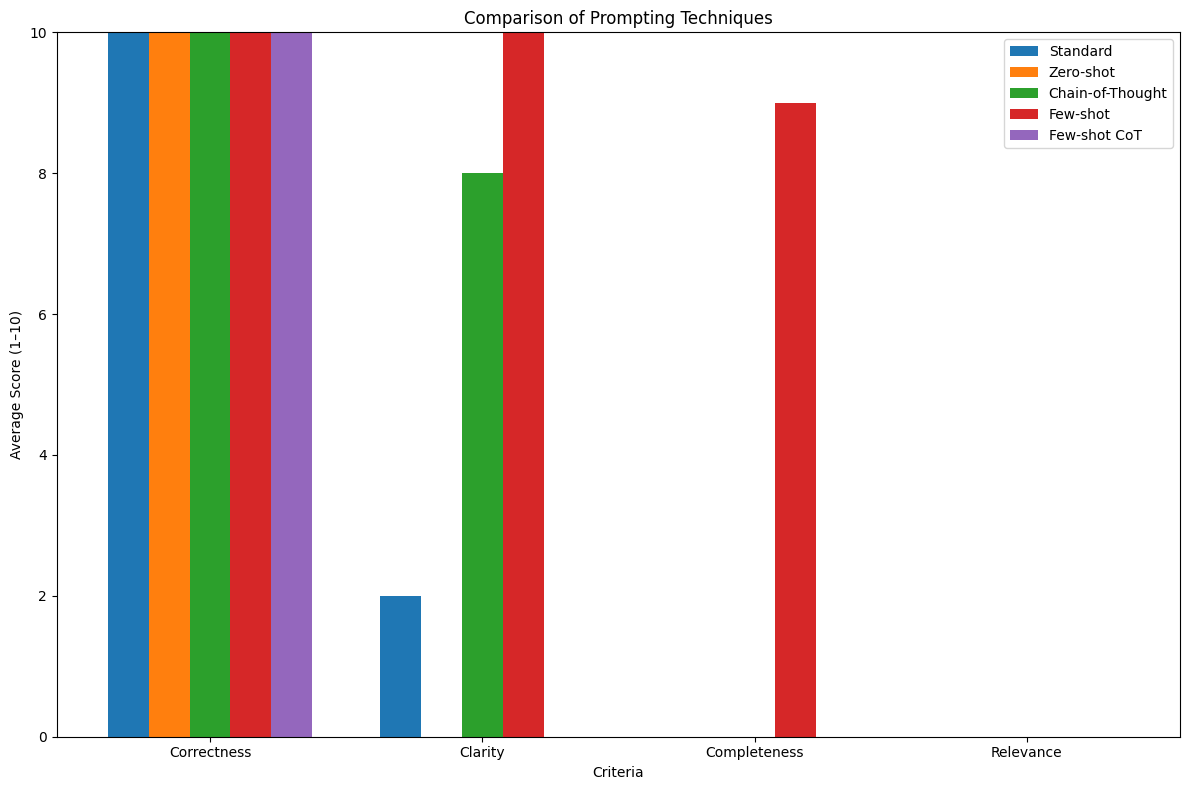

<Figure size 640x480 with 0 Axes>

In [ ]:
def extract_scores_from_evaluation(evaluation_text):
    """
    Extract numerical scores from LLM evaluation text.
    This is a simplified implementation and might need refinement.

    Args:
        evaluation_text (str): Text containing evaluations

    Returns:
        dict: Dictionary of technique to scores
    """
    import re

    technique_names = ["Standard", "Zero-shot", "Chain-of-Thought", "Few-shot", "Few-shot CoT"]
    scores = {technique: {} for technique in technique_names}

    # Look for patterns like "Technique: X/10" or "Technique - X/10"
    for technique in technique_names:
        pattern = fr'{technique}[^0-9]*(\d+)(?:/10)?'
        matches = re.findall(pattern, evaluation_text)
        if matches:
            criteria = ["Correctness", "Clarity", "Completeness", "Relevance"]
            for i, score in enumerate(matches[:len(criteria)]):
                try:
                    scores[technique][criteria[i]] = int(score)
                except ValueError:
                    scores[technique][criteria[i]] = 0

    return scores
def plot_evaluation_results(evaluation_results):
    """
    Plot evaluation results for visual comparison.

    Args:
        evaluation_results (list): Results from run_evaluation

    Returns:
        None (displays plots)
    """
    import matplotlib.pyplot as plt
    import numpy as np

    # Extract scores for each task
    all_scores = []
    technique_names = []

    for result in evaluation_results:
        llm_eval = result["metrics"]["llm_evaluation"]
        scores = extract_scores_from_evaluation(llm_eval)
        all_scores.append(scores)

        if not technique_names and scores:
            technique_names = list(scores.keys())

    # Aggregate scores
    agg_scores = {technique: {"Correctness": [], "Clarity": [], "Completeness": [], "Relevance": []}
                  for technique in technique_names}

    for scores in all_scores:
        for technique in technique_names:
            if technique in scores:
                for criterion, score in scores[technique].items():
                    agg_scores[technique][criterion].append(score)

    # Calculate averages
    avg_scores = {
        technique: {
            criterion: np.mean(values) if values else 0
            for criterion, values in criteria_scores.items()
        }
        for technique, criteria_scores in agg_scores.items()
    }

    # Plot
    criteria = ["Correctness", "Clarity", "Completeness", "Relevance"]
    fig, ax = plt.subplots(figsize=(12, 8))

    x = np.arange(len(criteria))
    width = 0.15
    multiplier = 0

    for technique, scores in avg_scores.items():
        offset = width * multiplier
        values = [scores.get(criterion, 0) for criterion in criteria]
        ax.bar(x + offset, values, width, label=technique)
        multiplier += 1

    ax.set_xlabel('Criteria')
    ax.set_ylabel('Average Score (1–10)')
    ax.set_title('Comparison of Prompting Techniques')
    ax.set_xticks(x + width * ((len(avg_scores) - 1) / 2))
    ax.set_xticklabels(criteria)
    ax.legend(loc='best')
    ax.set_ylim(0, 10)

    plt.tight_layout()
    plt.show()

    # Save figure
    plt.savefig('prompting_techniques_comparison.png')

plot_evaluation_results(evaluation_results)